In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

import os
import csv
import json
import random

In [4]:
# Import API key
from config import weather_api_key


In [5]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [7]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
 # GENERATE CITIES LIST
    
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [9]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [10]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)   

638

In [11]:
# create lists to store the data
name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

In [12]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key} 

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key

    
count=1

    
for city in cities: 
    cityurl = url+"&q="+city 
    response=requests.get(cityurl).json()
        
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])          
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])          
        date.append(response["dt"]) 
        print(f"Processing Record {count} of Set 1 | {city}")
        count = count + 1
    except (KeyError, IndexError):
        print ("City Not Found")
        
          


Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kloulklubed
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | francisco morato
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | griffith
Processing Record 15 of Set 1 | egvekinot
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | kilifi
Processing Record 21 of Set 1 | lujan
Processing Record 22 of Set 1 | lasa
City Not Found
Processing Record 23 of Set 1 | acajutla
Processing Record 24 of Set 1 | linxia
Processing 

Processing Record 192 of Set 1 | whitehorse
Processing Record 193 of Set 1 | san vicente
Processing Record 194 of Set 1 | ngawen
Processing Record 195 of Set 1 | ilhabela
City Not Found
Processing Record 196 of Set 1 | maple creek
Processing Record 197 of Set 1 | moa
Processing Record 198 of Set 1 | ilulissat
City Not Found
Processing Record 199 of Set 1 | abu samrah
Processing Record 200 of Set 1 | progreso
Processing Record 201 of Set 1 | grand island
Processing Record 202 of Set 1 | castelfranco di sotto
City Not Found
Processing Record 203 of Set 1 | chapais
Processing Record 204 of Set 1 | hasaki
Processing Record 205 of Set 1 | simao
Processing Record 206 of Set 1 | eyl
Processing Record 207 of Set 1 | cayenne
Processing Record 208 of Set 1 | narasannapeta
Processing Record 209 of Set 1 | chunoyar
Processing Record 210 of Set 1 | carnarvon
Processing Record 211 of Set 1 | vestmannaeyjar
Processing Record 212 of Set 1 | ahipara
Processing Record 213 of Set 1 | porto novo
Processin

Processing Record 381 of Set 1 | port blair
Processing Record 382 of Set 1 | havre-saint-pierre
Processing Record 383 of Set 1 | puerto del rosario
Processing Record 384 of Set 1 | vernon
Processing Record 385 of Set 1 | alice springs
Processing Record 386 of Set 1 | yanam
City Not Found
Processing Record 387 of Set 1 | pangody
Processing Record 388 of Set 1 | sorland
Processing Record 389 of Set 1 | berlevag
City Not Found
Processing Record 390 of Set 1 | namatanai
Processing Record 391 of Set 1 | savannakhet
Processing Record 392 of Set 1 | auki
Processing Record 393 of Set 1 | margate
Processing Record 394 of Set 1 | geraldton
Processing Record 395 of Set 1 | san quintin
Processing Record 396 of Set 1 | nurobod
Processing Record 397 of Set 1 | lannion
Processing Record 398 of Set 1 | grimshaw
Processing Record 399 of Set 1 | togur
Processing Record 400 of Set 1 | channel-port aux basques
Processing Record 401 of Set 1 | jingdezhen
Processing Record 402 of Set 1 | ulaanbaatar
Process

Processing Record 569 of Set 1 | maroantsetra
Processing Record 570 of Set 1 | visby
Processing Record 571 of Set 1 | maine-soroa
Processing Record 572 of Set 1 | aksu
Processing Record 573 of Set 1 | la cruz
Processing Record 574 of Set 1 | banyo
Processing Record 575 of Set 1 | stykkisholmur
Processing Record 576 of Set 1 | aljezur
Processing Record 577 of Set 1 | nelson bay
Processing Record 578 of Set 1 | lebanon
Processing Record 579 of Set 1 | flinders
Processing Record 580 of Set 1 | borogontsy
Processing Record 581 of Set 1 | kot samaba


In [13]:
# Export the city data into a .csv.
# Display the DataFrame

weather_dict = {"City": name,"Latitude": lat, "Longitude":lng,
                "Max Temp":temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind,"Country":country, "Date":date}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df

weather_data_df.to_csv("cities.csv")

In [39]:
# {'coord': {'lon': -78.64, 'lat': 35.77},
#  'weather': [{'id': 801,
#    'main': 'Clouds',
#    'description': 'few clouds',
#    'icon': '02d'}],
#  'base': 'stations',
#  'main': {'temp': 61.41,
#   'feels_like': 57.06,
#   'temp_min': 59,
#   'temp_max': 64,
#   'pressure': 1024,
#   'humidity': 67},
#  'visibility': 10000,
#  'wind': {'speed': 8.05, 'deg': 70},
#  'clouds': {'all': 20},
#  'dt': 1601737035,
#  'sys': {'type': 1,
#   'id': 5645,
#   'country': 'US',
#   'sunrise': 1601723483,
#   'sunset': 1601765713},
#  'timezone': -14400,
#  'id': 4487042,
#  'name': 'Raleigh',
#  'cod': 200}

In [14]:
#inspect the data and remove cities were the humidity is > 100%
weather_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.531102,17.327194,58.984303,71.017212,55.142857,8.218417,1.603635e+09
std,34.153855,90.483069,24.277704,22.109205,39.651437,5.783232,5.875589e+01
min,-54.800000,-179.170000,1.400000,7.000000,0.000000,0.130000,1.603635e+09
25%,-6.880000,-59.140000,41.000000,61.000000,11.000000,4.000000,1.603635e+09
50%,23.230000,21.420000,64.400000,77.000000,68.000000,6.930000,1.603635e+09
75%,50.100000,97.520000,78.800000,87.000000,96.000000,11.030000,1.603635e+09
max,78.220000,179.320000,102.720000,100.000000,100.000000,45.950000,1.603635e+09


In [15]:
print(f"There are no cities with humidity greater than 100%")

There are no cities with humidity greater than 100%


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,74.61,79,100,18.84,PF,1603635047
1,Kloulklubed,7.04,134.26,78.80,88,75,3.36,PW,1603635047
2,Torbay,47.67,-52.73,48.24,93,90,12.75,CA,1603635047
3,Iqaluit,63.75,-68.51,10.20,78,40,12.75,CA,1603635047
4,Hilo,19.73,-155.09,72.39,83,90,3.36,US,1603635048


In [19]:
# use pandas to give quartile calculations

humidity = weather_data_df['Humidity']
quartiles = humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidty is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of humidity is: 61.0
The upper quartile of humidty is: 87.0
The interquartile range of humidity is: 26.0
The the median of humidity is: 77.0 
Values below 22.0 could be outliers.
Values above 126.0 could be outliers.


In [29]:
#df = df.an_operation(inplace=False)
#clean_file = clean_file.loc[clean_file["Release Year"] >= '1990']
clean_city_data = weather_data_df.loc[weather_data_df["Humidity"] > 22]

In [30]:
clean_city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,74.61,79,100,18.84,PF,1603635047
1,Kloulklubed,7.04,134.26,78.80,88,75,3.36,PW,1603635047
2,Torbay,47.67,-52.73,48.24,93,90,12.75,CA,1603635047
3,Iqaluit,63.75,-68.51,10.20,78,40,12.75,CA,1603635047
4,Hilo,19.73,-155.09,72.39,83,90,3.36,US,1603635048
...,...,...,...,...,...,...,...,...,...
575,Aljezur,37.32,-8.80,68.23,74,86,17.90,PT,1603635148
576,Nelson Bay,-32.72,152.15,58.57,100,90,14.99,AU,1603635148
577,Lebanon,36.21,-86.29,54.36,93,90,4.70,US,1603635148
578,Flinders,-34.58,150.86,57.42,93,100,11.01,AU,1603635148


Text(0, 0.5, 'Max Temperature (F)')

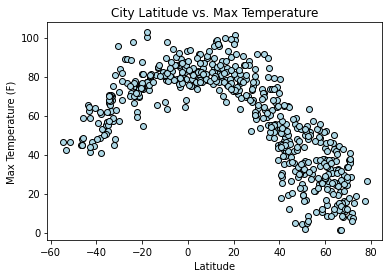

In [39]:
#Latitude vs. Temperature Plot
#plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")
plt.scatter(lat, temp, marker="o", facecolors="lightblue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


Text(0, 0.5, 'Humidity (%)')

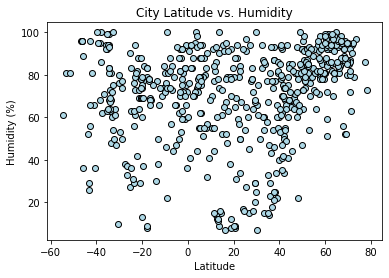

In [40]:
#Latitude vs. Humidity Plot
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


Text(0, 0.5, 'Cloudiness (%)')

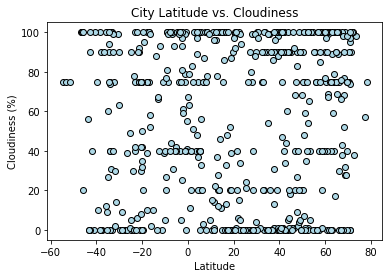

In [41]:
#Latitude vs. Cloudiness Plot
plt.scatter(lat, cloudiness, marker="o", facecolors="lightblue", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


Text(0, 0.5, 'Wind Speed (mph)')

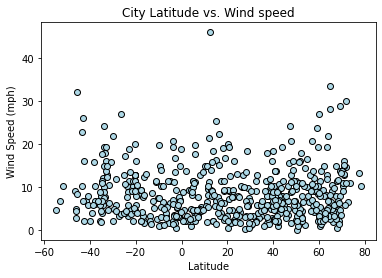

In [42]:
#Latitude vs. Wind Speed Plot
plt.scatter(lat, wind, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("City Latitude vs. Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


In [ ]:
#Linear Regression
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#Linear Regression
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#Linear Regression
#Northern Hemisphere - Humidity vs. Latitude Linear Regression

In [ ]:
#Linear Regression
#Southern Hemisphere - Humidity vs. Latitude Linear Regression